<a href="https://colab.research.google.com/github/jinsumin81/2025-1-myclass-BDA/blob/main/inclass/10w_A_mon_0519_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10주 단원 08-3 그래프 만들기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.1 MB/s eta 0:00:00


In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
pd.set_option('display.precision', 2)

In [5]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 2.19 MiB | 3.88 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [6]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [7]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [8]:
mpg.isna().sum().sum()

np.int64(0)

In [9]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

In [12]:
df_mpg = mpg.groupby('drv').agg(mean_hwy=('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [13]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


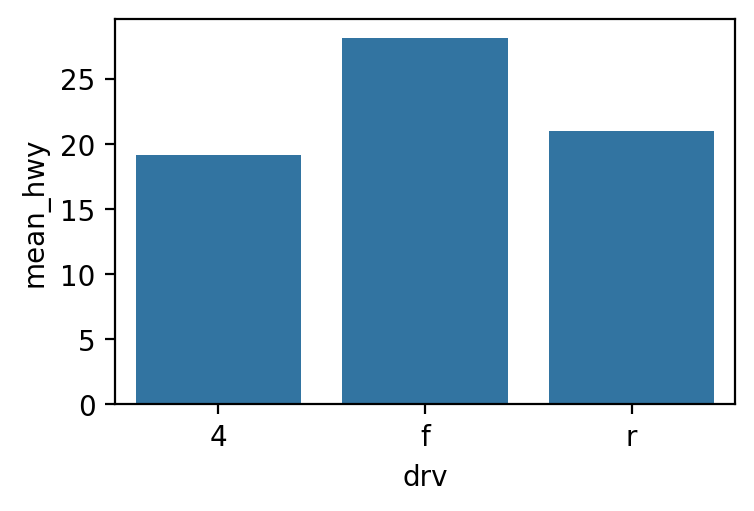

In [14]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy');

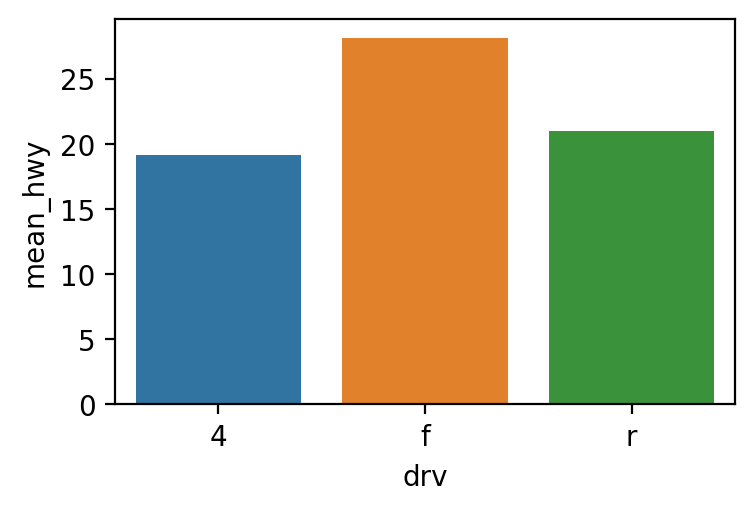

In [15]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv');

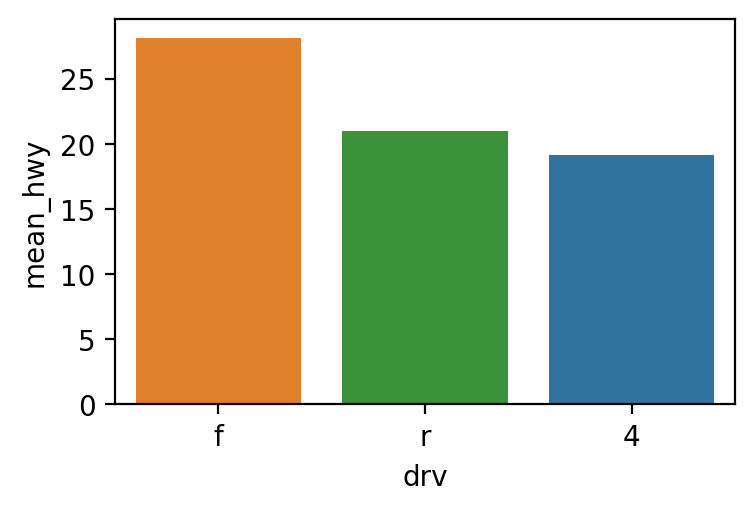

In [16]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv', order=['f', 'r', '4']);

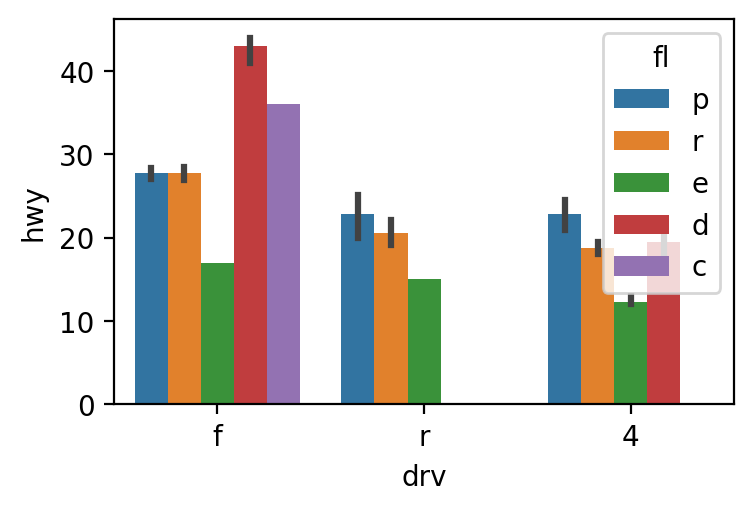

In [17]:
sns.barplot(data=mpg, x='drv', y='hwy', hue='fl', order=['f', 'r', '4']);

In [18]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [19]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model':'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [20]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [21]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


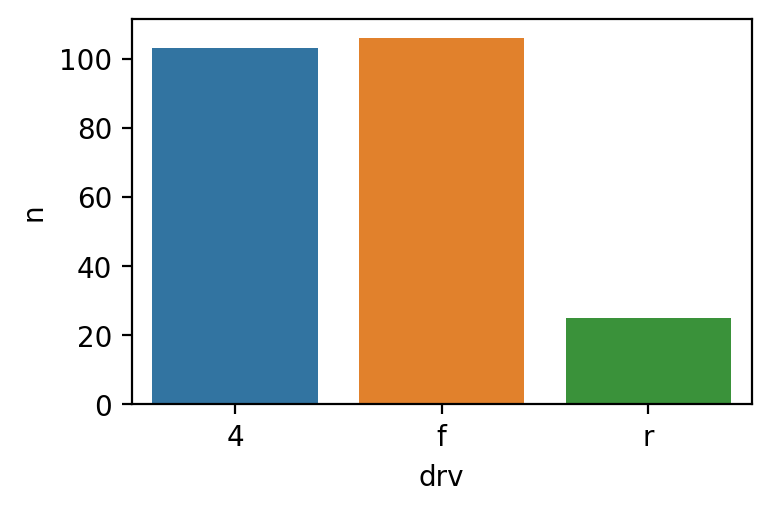

In [22]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv');

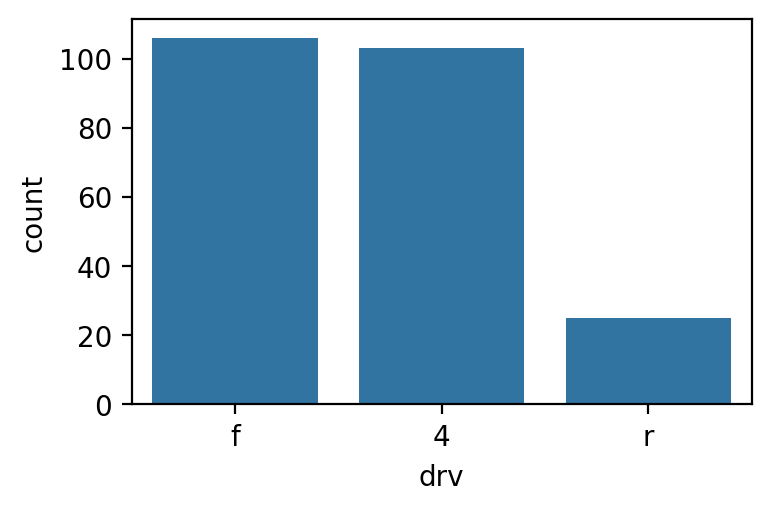

In [23]:
sns.countplot(data=mpg, x='drv');

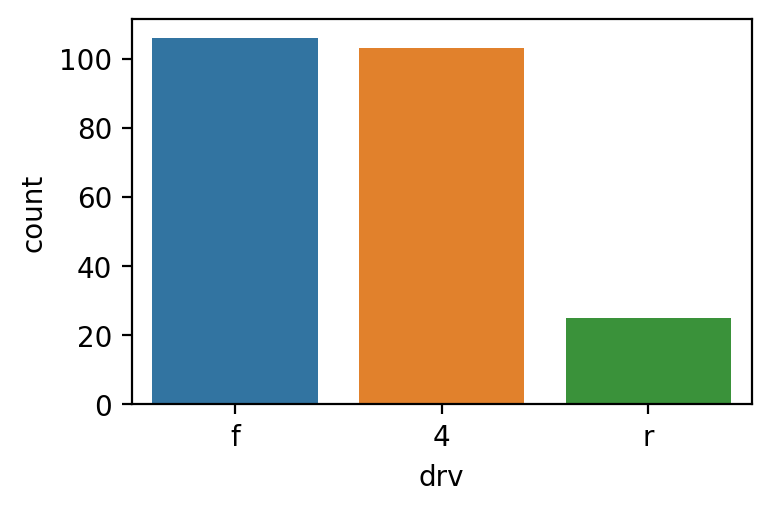

In [24]:
sns.countplot(data=mpg, x='drv', hue='drv');

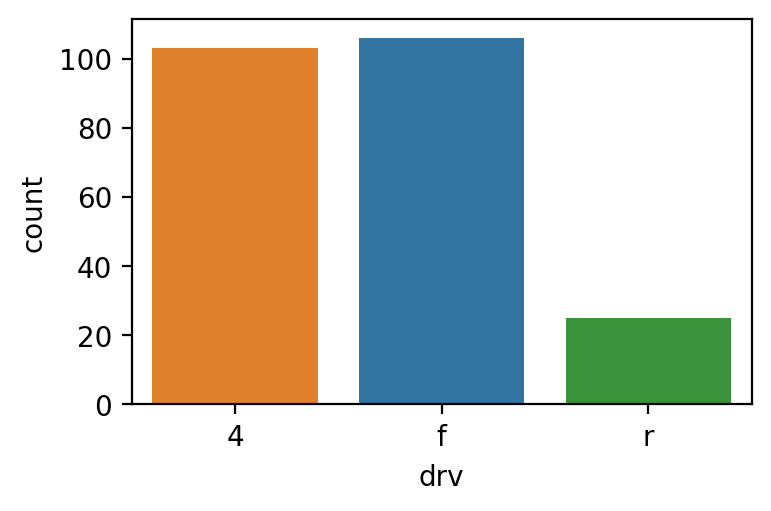

In [25]:
sns.countplot(data=mpg, x='drv', hue='drv', order=['4', 'f', 'r']);

In [26]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

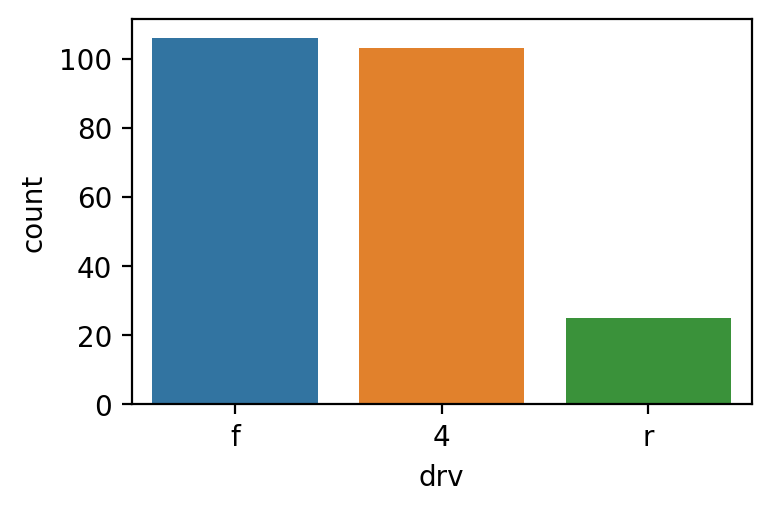

In [27]:
sns.countplot(data=mpg, x='drv', hue='drv', order=mpg.drv.value_counts().index);

In [28]:
!rm -r data

In [29]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 2.19 MiB | 3.88 MiB/s, done.
Resolving deltas: 100% (8/8), done.


#주요 컬럼 설명
* date: 데이터 수집 날짜 (연도-월-일 형식)
* pce: 개인 소비 지출 (Personal Consumption Expenditures, 백만 달러 단위)
* pop: 인구 수 (Population, 천명 단위)
* psavert: 개인 저축률 (Personal Savings Rate, % 단위)
* uempmed: 실업자 평균 실업 기간 (Median Duration of Unemployment, 주 단위)
* unemploy: 실업자 수 (Unemployed, 천명 단위)

In [30]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [31]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [32]:
eco.shape

(574, 6)

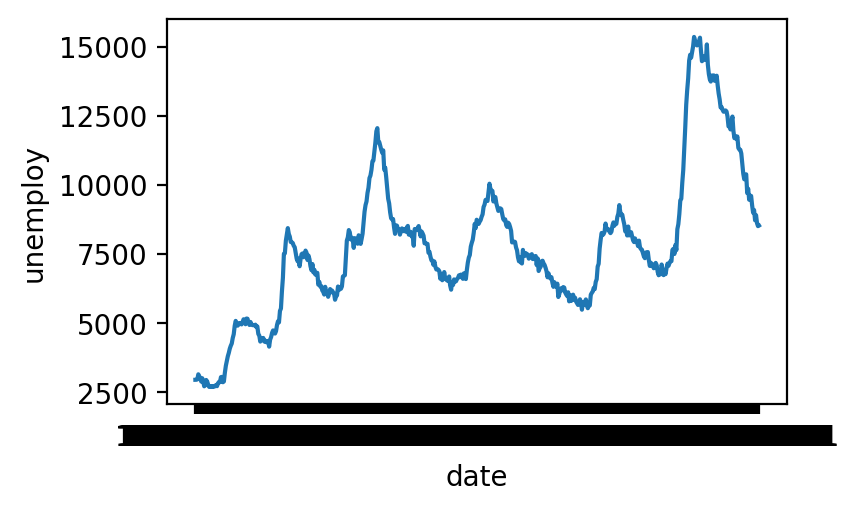

In [33]:
sns.lineplot(data=eco, x='date', y='unemploy');

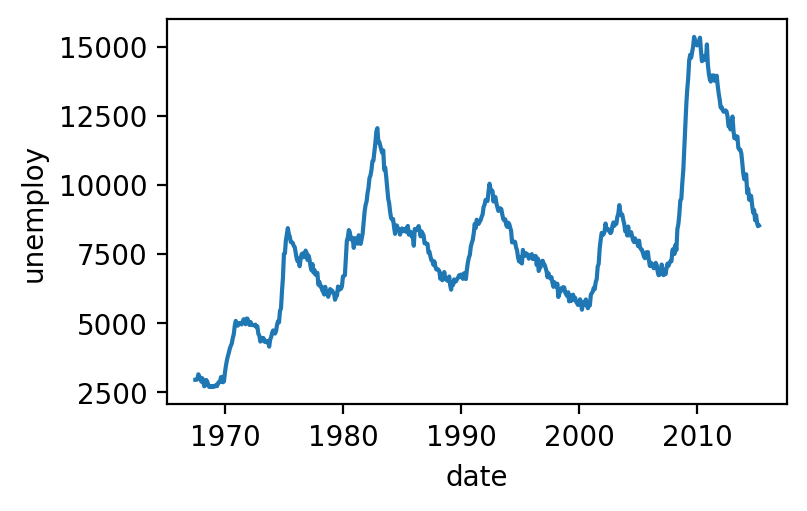

In [34]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='unemploy');

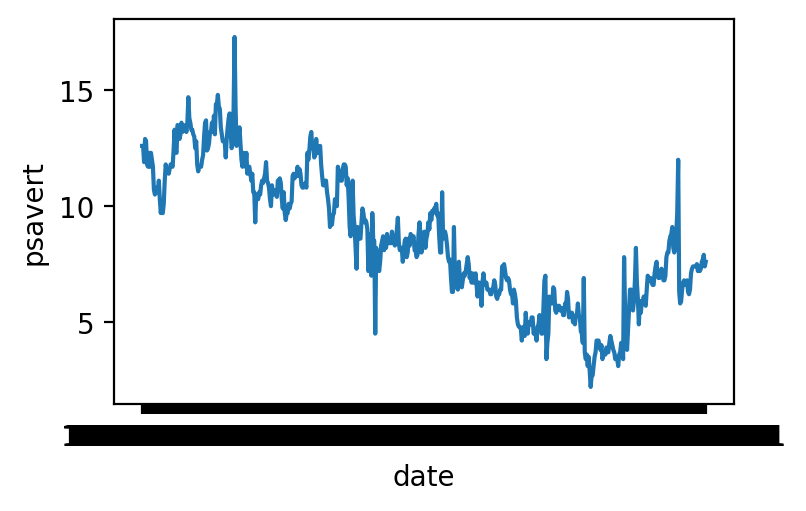

In [35]:
sns.lineplot(data=eco, x='date', y='psavert');

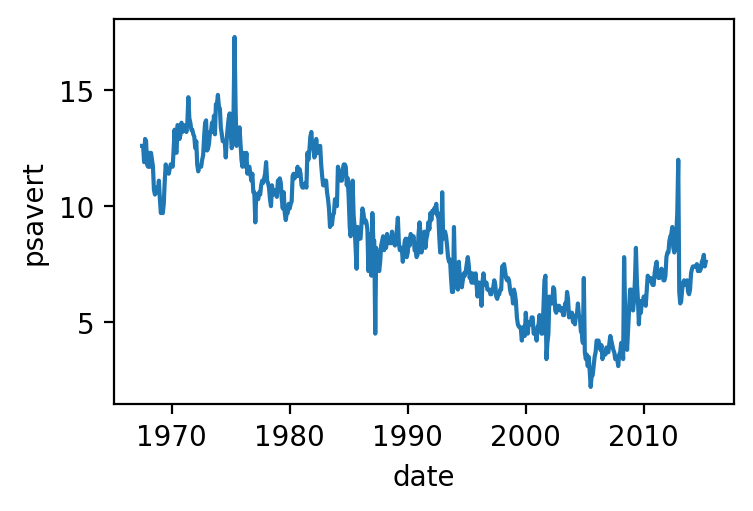

In [36]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='psavert');

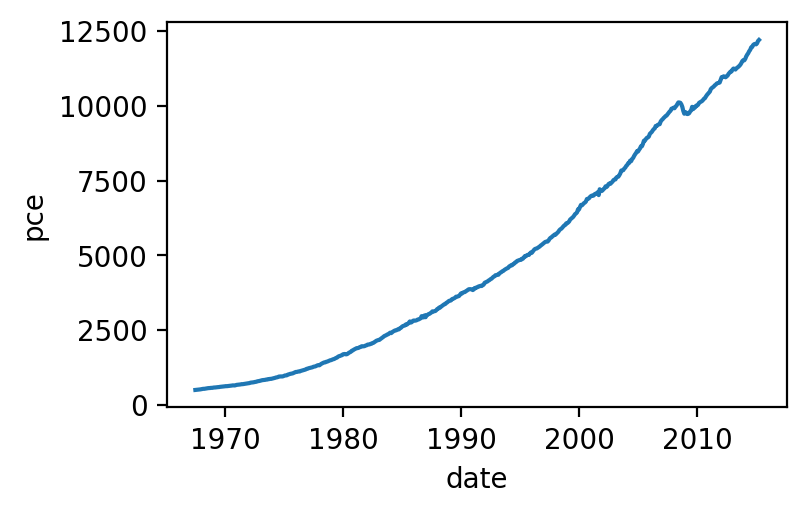

In [37]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce');

In [38]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [39]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [40]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [41]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [42]:
eco.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [43]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [44]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [45]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [46]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [47]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


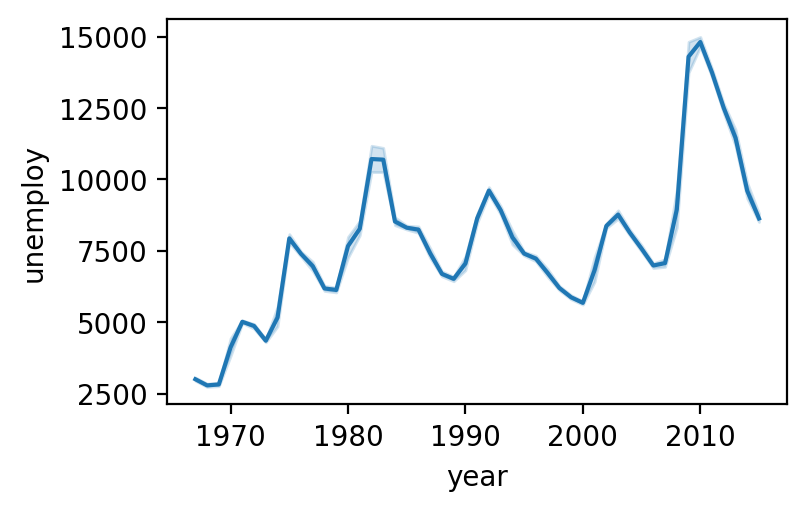

In [48]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy');

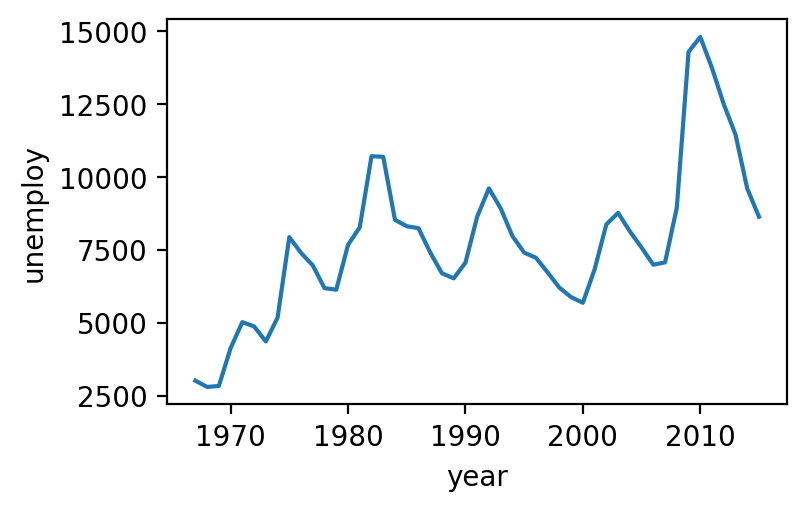

In [50]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy', errorbar=None);

<Axes: xlabel='drv', ylabel='hwy'>

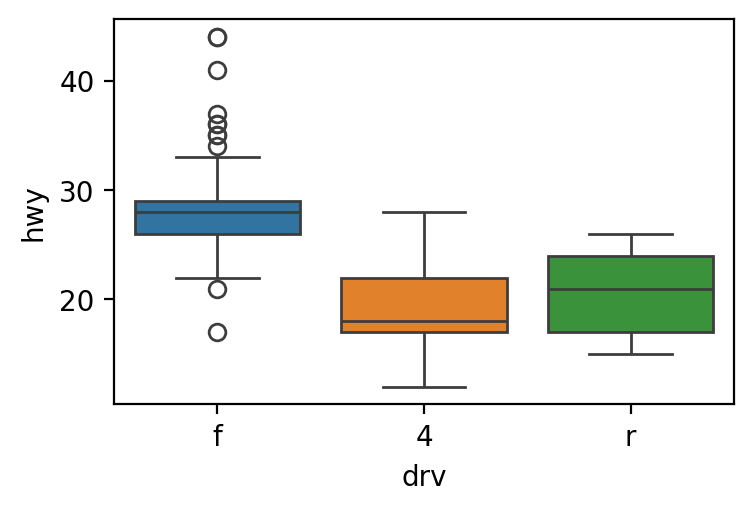

In [51]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')


In [52]:
plt.rcParams.update({'figure.figsize': [7, 3]})

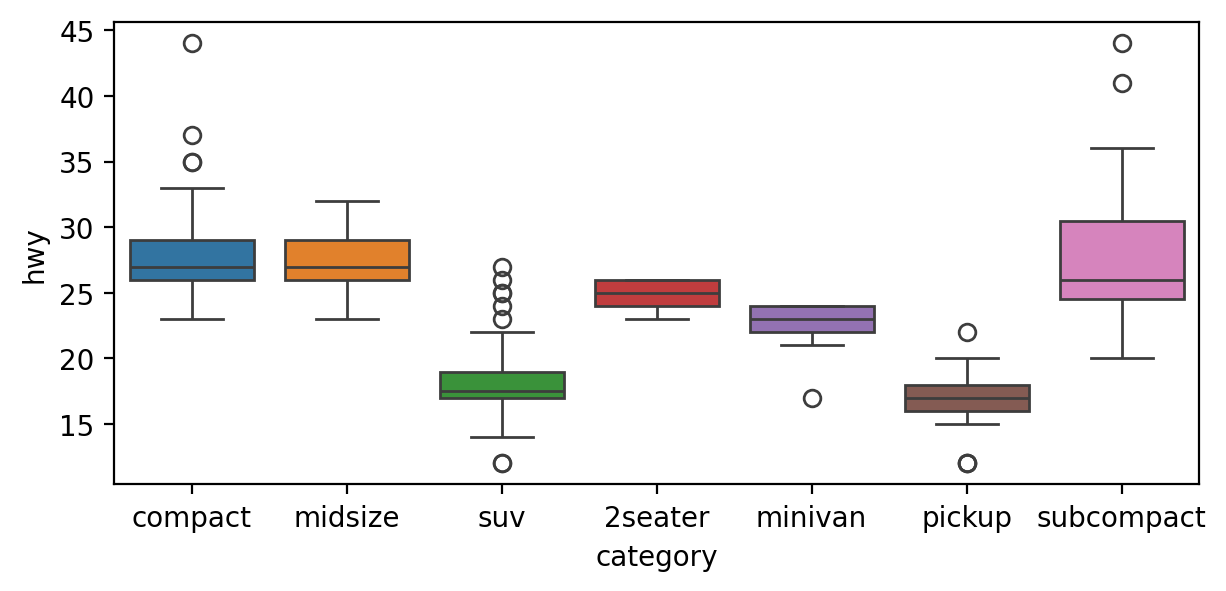

In [53]:
sns.boxplot(mpg, x='category', y='hwy', hue='category');

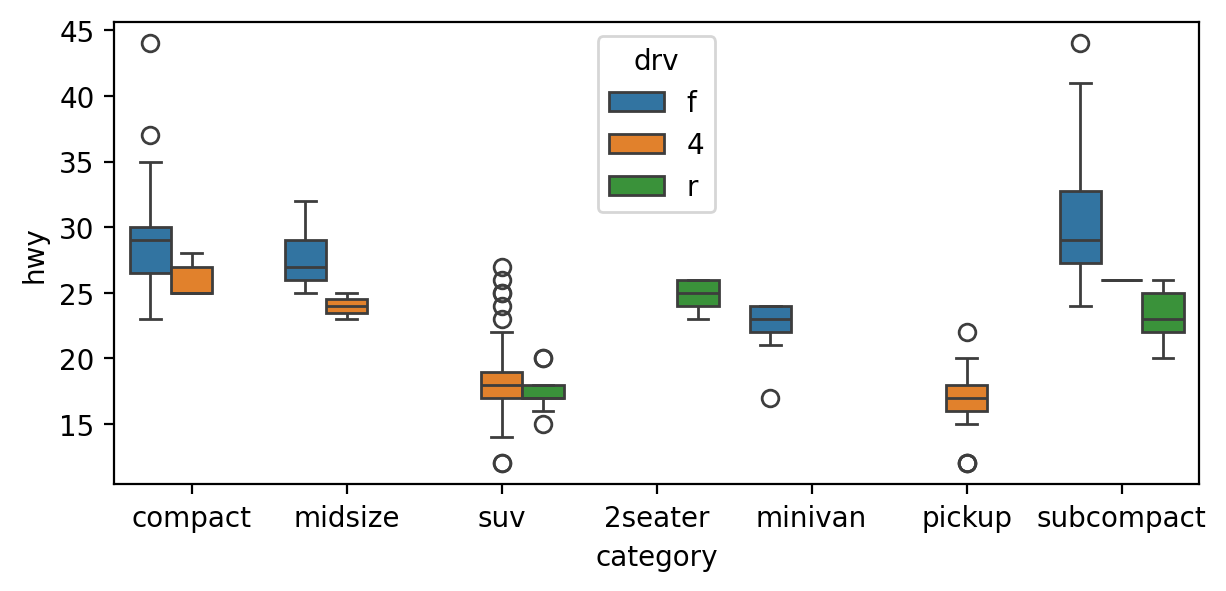

In [54]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

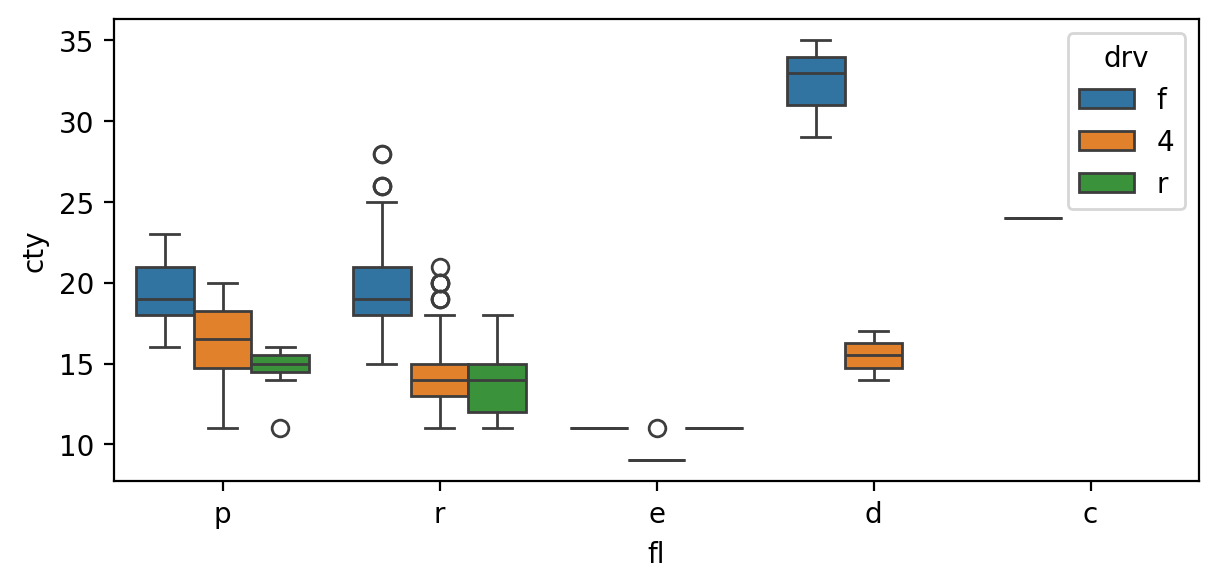

In [55]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv');

In [56]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [57]:
mpg[ mpg.fl == "e" ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


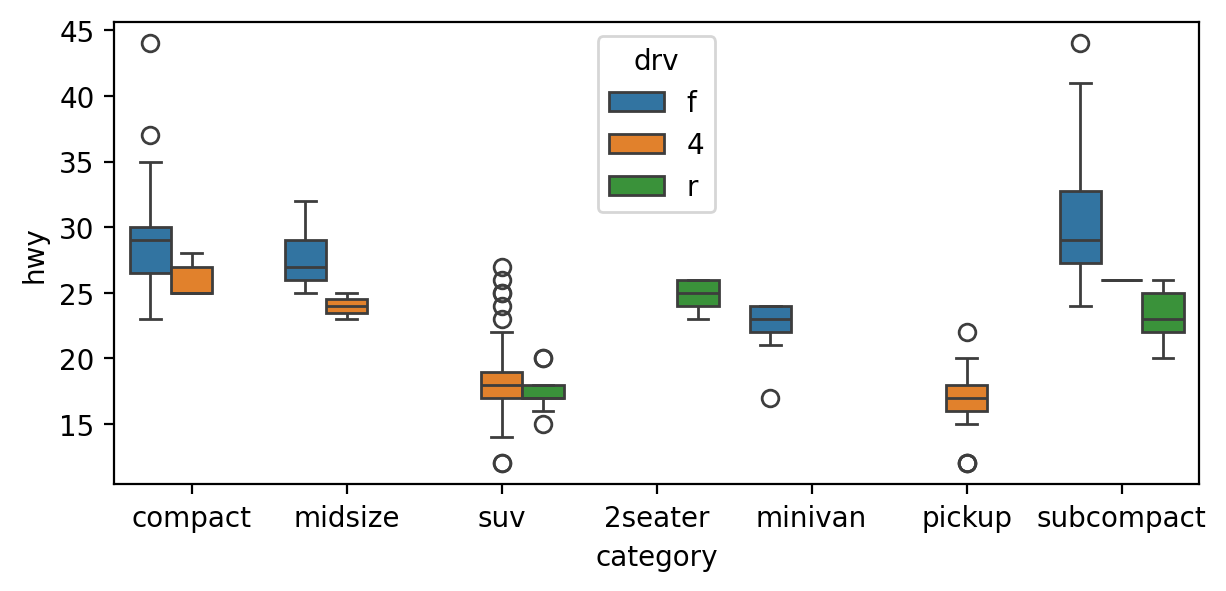

In [58]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

정리하기

| seaborn 함수 | 그래프 |
|--------------|--------|
| sns.scatterplot() | 산점도 |
| sns.barplot() |	막대 그래프 - 요약표 활용 |
| sns.countplot() |	막대 그래프 - 원자료 활용 |
| sns.lineplot() |	선 그래프 |
| sns.boxplot() |	상자 그림 |